<a href="https://colab.research.google.com/github/Rezquellah/ML-Intro/blob/main/Fish_Weight_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the fish weight using Linear Regression

Dataset link: https://www.kaggle.com/datasets/aungpyaeap/fish-market/code

##Importing the librairies

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [59]:
data = pd.read_csv('Fish.csv')

In [60]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Exploratory Data Analysis (EDA):

The first step is to perform some EDA on the dataset we want to understand the structure and characteristics of the dataset. This includes checking for missing values, data types, summary statistics, and data distributions.

### Checking for NULL values

<front color = 'Green'>**Yeaaaah we have 0 Missing values! ✌**</font>

In [61]:
data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### Data types
**Species**: is a <font color ='red'>**categorical**</font> variable with an object data type.

**Weight**, **Length1**, **Length2**, **Length3**, **Height**, and **Width**: <font color='red'>**Numeric**</font> variables with float64 data type.

In [62]:
data.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

### Descriptive Statistics

In [63]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


For the numeric variables, we can see that the range, mean, standard deviation, and quartile values vary significantly between the different features. For instance, the Weight feature has a range of 242g to 1600g, with a mean of 398g and a standard deviation of 357g. In contrast, the Height feature has a range of 1.728cm to 18.954cm, with a mean of 7.71cm and a standard deviation of 2.33cm. These statistics provide an idea of the distribution of values and the degree of variation in the dataset.

In [64]:
# Generate frequency distribution for categorical variable
print(data['Species'].value_counts())

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


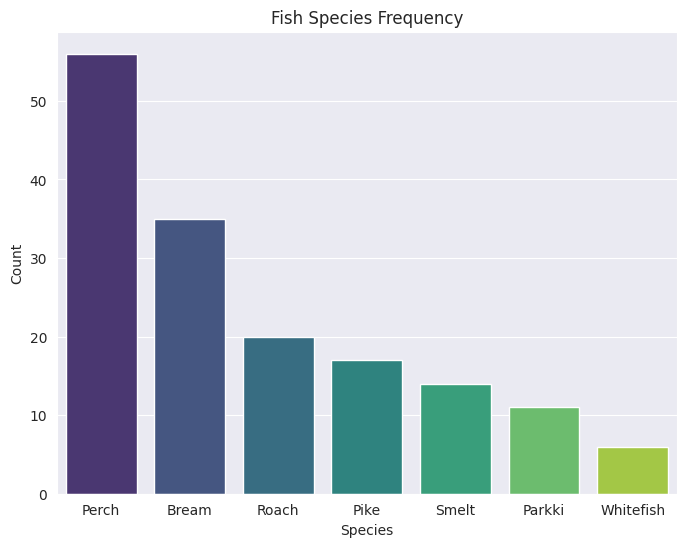

In [65]:
# Create a frequency table for the Species variable
species_counts = data['Species'].value_counts()

# Create a bar plot using Seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.barplot(x=species_counts.index, y=species_counts.values, palette='viridis')
plt.title('Fish Species Frequency')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


For the categorical variable Species, we can see that there are **seven** unique categories of fish species in the dataset, with varying frequencies. The most common species is the "Perch", followed by "Bream" and "Roach". These frequencies provide an idea of the distribution of categories in the dataset.

### Data distrubution 
In the below plot, we can see that the weight values are distributed somewhat normally, with a peak around 200-300 grams. There are some outliers towards the right side of the plot, indicating that there are a few very large fish in the dataset.

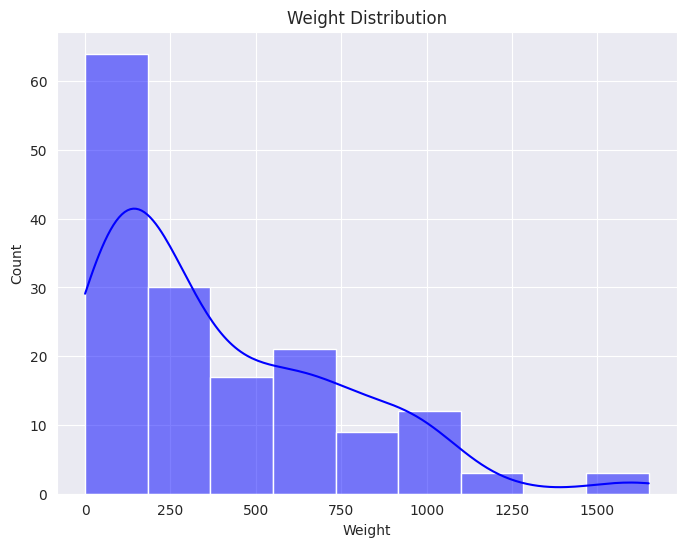

In [66]:

# Plot the distribution of the Weight variable using a histogram
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.histplot(data['Weight'], kde=True, color='blue', alpha=0.5)
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()


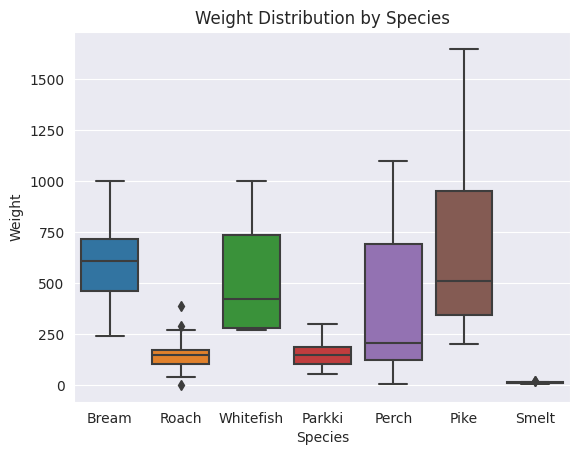

In [67]:
# Create the box plot
sns.boxplot(x='Species', y='Weight', data=data)

# Set the plot title
plt.title('Weight Distribution by Species')

# Display the plot
plt.show()

### Correlation 

We can see that the **Weight** variable is <font color ='green'>**highly correlated**</font> with the **length** and **width** variables, with correlation coefficients ranging from <font color = 'red'>**0.89**</font> to <font color = 'red'>**0.92**</font>. This suggests that fish that are longer or wider tend to be heavier. The Height variable, on the other hand, is only moderately correlated with Weight, with a correlation coefficient of **0.72**. This suggests that the height of a fish may be less predictive of its weight than its length and width.

In [68]:
# Calculate the correlation matrix
corr_matrix = data.corr()
corr_matrix


<ipython-input-68-ebba4916f2d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


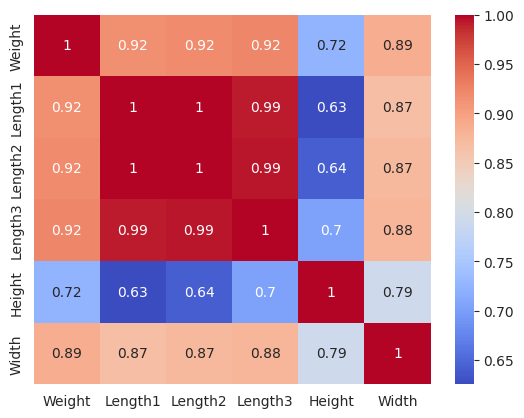

In [69]:
# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

### Checking linearty 

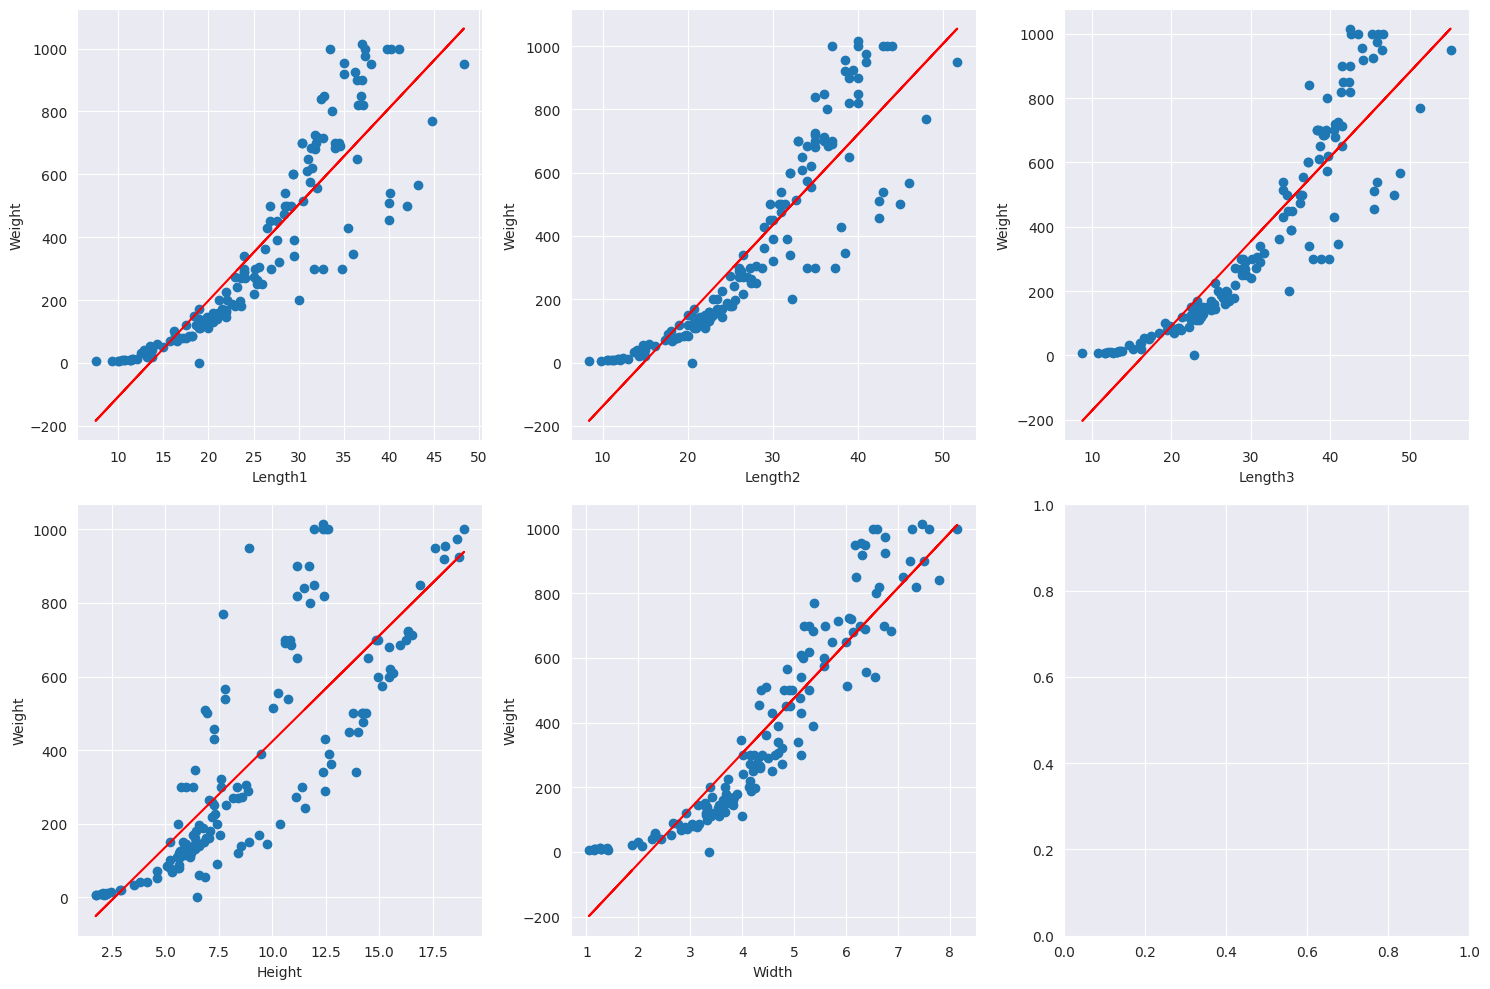

In [85]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, col in enumerate(['Length1', 'Length2', 'Length3', 'Height', 'Width']):
    axs[i].scatter(data[col], data['Weight'])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Weight')
    
    # Fit a linear regression line
    p = np.polyfit(data[col], data['Weight'], 1)
    axs[i].plot(data[col], p[0] * data[col] + p[1], color='red')

plt.tight_layout()
plt.show()


### handling outliers

From the plot, we can see that the outliers (in red) are located far away from the majority of the data points (in blue), and are likely to have a significant impact on any analysis that uses the Weight variable.

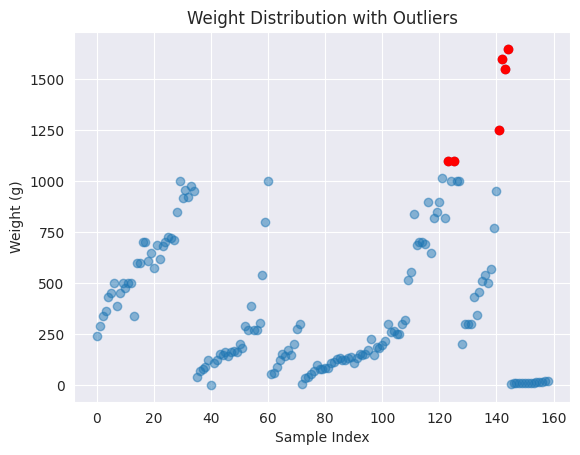

In [70]:
# Compute the IQR of the Weight variable
Q1 = data['Weight'].quantile(0.25)
Q3 = data['Weight'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers as any data points that lie more than 1.5 times the IQR away from the median
median = data['Weight'].median()
outliers = data[(data['Weight'] < median - 1.5*IQR) | (data['Weight'] > median + 1.5*IQR)]

# Create a scatter plot of the Weight variable with the outliers highlighted in red
plt.scatter(data.index, data['Weight'], alpha=0.5)
plt.scatter(outliers.index, outliers['Weight'], color='red')

# Set the plot title and axis labels
plt.title('Weight Distribution with Outliers')
plt.xlabel('Sample Index')
plt.ylabel('Weight (g)')

# Display the plot
plt.show()


In [71]:
# Removing outliers 
outliers = data[(data['Weight'] < median - 1.5*IQR) | (data['Weight'] > median + 1.5*IQR)]

In [72]:
outliers

,Species,Weight,Length1,Length2,Length3,Height,Width
123,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
125,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800


In [73]:
# Remove the outliers from the original dataset
data = data[~data.isin(outliers)].dropna()

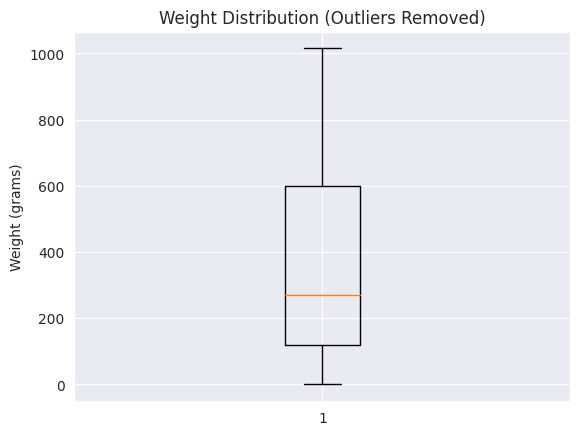

In [74]:
# Create a box plot of the Weight variable
plt.boxplot(data['Weight'])
plt.title('Weight Distribution (Outliers Removed)')
plt.ylabel('Weight (grams)')
plt.show()

### Feature engineering

In [75]:
# Create a new feature for overall size of the fish
data['Size'] = np.pi * data['Length1'] * data['Length2'] * data['Length3']
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Size
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,55538.331567
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,61868.766428
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,61880.531692
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,80269.106016
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,82086.674446


### Feature selection

In [76]:
# Create dummy variables for the Species column using one-hot encoding
species_dummies = pd.get_dummies(data['Species'], prefix='Species')

# Concatenate the original dataframe and the dummy variables
data = pd.concat([data, species_dummies], axis=1)

# Drop the original Species column since it's no longer needed
data.drop('Species', axis=1, inplace=True)

# Separate the feature matrix X and the target variable y
X = data.drop('Weight', axis=1)
y = data['Weight']


I have used the SelectKBest function from scikit-learn to select the top **k** features that have the highest F-test scores with the target variable. In this example, we'll select the top 3 features:

In [77]:
selector = SelectKBest(score_func=f_regression, k=3)
selector.fit(X, y)

SelectKBest(k=3, score_func=<function f_regression at 0x7fc743614940>)

In [78]:
#Print out the F-test scores for each feature:
scores = selector.scores_
for i in range(len(scores)):
    print('Feature %d: %f' % (i, scores[i]))

Feature 0: 564.770789
Feature 1: 594.765761
Feature 2: 674.273351
Feature 3: 316.560003
Feature 4: 892.021336
Feature 5: 449.267194
Feature 6: 41.555598
Feature 7: 5.592047
Feature 8: 0.017221
Feature 9: 2.037274
Feature 10: 11.576336
Feature 11: 23.401542
Feature 12: 1.998457


In [79]:
# Print out the names of the top k selected features:
features = selector.transform(X)
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['Length2', 'Length3', 'Width'], dtype='object')


In [81]:
# Update the  dataframe with the selected features:
X = pd.DataFrame(features, columns=selected_features)

### Spliting and scaling the data

In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler object and fit it to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to the test data
X_test_scaled = scaler.transform(X_test)

### Creating the Linear Regression Model

In [89]:
# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

print("R-squared score:", r2)

R-squared score: 0.9010631734775174


In [93]:
X

,Length2,Length3,Width
0,25.4,30.0,4.0200
1,26.3,31.2,4.3056
2,26.5,31.1,4.6961
3,29.0,33.5,4.4555
4,29.0,34.0,5.1340
...,...,...,...
148,12.2,13.4,1.3936
149,12.4,13.5,1.2690
150,13.0,13.8,1.2558
151,14.3,15.2,2.0672


In [98]:
# Create some new data to test the model
new_data = np.array([[22.3, 25.4, 7.3], [25.1, 27.9, 6.2], [20.2, 22.0, 5.0]])

# Scale the new data using the saved scaler object
new_data_scaled = scaler.transform(new_data)

# Use the loaded model to make predictions on the new data
predictions = model.predict(new_data_scaled)

# Print the predicted weights
print(predictions)


[608.92806498 522.29218502 331.73785739]


In [99]:
import pickle

# save the scaler and model
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# load the scaler and model
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# load new data and transform with scaler
new_data = [[25.4, 30.0, 11.5200]]
new_data_scaled = scaler.transform(new_data)

# make predictions using the loaded model
predictions = model.predict(new_data_scaled)

print(predictions)


[1092.5363761]
